In [2]:
#掛接雲端硬碟
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/")
!ls -l "/content/gdrive/MyDrive/112-2_LATIA"


Mounted at /content/gdrive/
total 125601
-rw------- 1 root root      7584 Mar 19 08:09  111_ab111_Country.csv
-rw------- 1 root root     10164 Mar 19 08:09  111_ab111_School.csv
-rw------- 1 root root     92484 Feb 27 06:26  112_student.csv
-rw------- 1 root root    112488 Mar 12 08:46  112_students_tf.csv
drwx------ 2 root root      4096 Apr  2 06:14 'Ch1-5.zip (Unzipped Files)'
-rw------- 1 root root 107727729 Mar  5 06:05  edu_sample_data.csv
-rw------- 1 root root       151 Mar 19 06:46  products.csv
-rw------- 1 root root  20659344 Mar 29 08:36  TaipeiSansTCBeta-Regular.ttf


In [3]:
#匯入pandas
import pandas as pd

#匯入matpltlib.pyplot以製圖
import matplotlib.pyplot as plt


csv_file = '/content/gdrive/MyDrive/112-2_LATIA/111_ab111_Country.csv'
columns = [
    "學年度","洲別","國別","學位生_正式修讀學位外國生","學位生_僑生(含港澳)","學位生_正式修讀學位陸生","非學位生_外國交換生",
    "非學位生_外國短期研習及個人選讀","非學位生_大專附設華語文中心學生","非學位生_大陸研修生","非學位生_海青班","境外專班"
]
df = pd.read_csv(csv_file, encoding='utf-8')
print(df.head())
print(df.info())

   學年度  洲別    國別  學位生_正式修讀學位外國生  學位生_僑生(含港澳)  學位生_正式修讀學位陸生  非學位生_外國交換生  \
0  111  亞洲    越南          13649         2492             0         174   
1  111  亞洲    印尼           5388         4274             0         765   
2  111  亞洲  馬來西亞           3169         7755             0          67   
3  111  亞洲    香港              0         9069             0          86   
4  111  亞洲    日本           2465          205             0         888   

   非學位生_外國短期研習及個人選讀  非學位生_大專附設華語文中心學生  非學位生_大陸研修生  非學位生_海青班  境外專班  
0               310              6962           0        35   204  
1               250              3938           0       150     1  
2                57               596           0       763    95  
3               137               113           0         0     0  
4               624              3141           0         0     1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dty

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [5]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-04-04 15:00:37--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.145.100, 142.250.145.139, 142.250.145.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.145.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-04 15:00:37--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.69.132, 2a00:1450:4013:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.69.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  39.8MB/s    in 0.5s    

2024-04-04 15

**1.來自哪個國家的學位生人數最多?**

   學位生_正式修讀學位外國生  學位生_僑生(含港澳)  學位生_正式修讀學位陸生    國別
0          13649         2492             0    越南
1           5388         4274             0    印尼
2           3169         7755             0  馬來西亞
4           2465          205             0    日本
5           1560          263             0    泰國 

111學年度外籍學位生最多人數之國家為 ['越南']


Text(0.5, 1.0, '111學年度外籍學位生最多人數之國家')

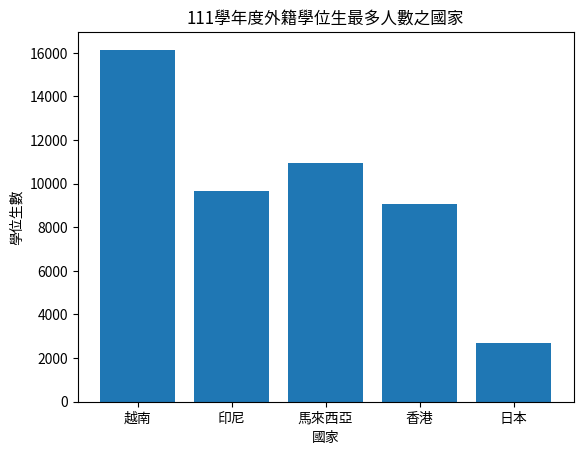

In [22]:
#取出需要的資料欄位(dataframe)
df1 = df[['學位生_正式修讀學位外國生','學位生_僑生(含港澳)','學位生_正式修讀學位陸生','國別']]

#建立新dataframe,並利用sum(axis=1)計算學位生總數
df["學位生數"]=df[['學位生_正式修讀學位外國生','學位生_僑生(含港澳)','學位生_正式修讀學位陸生']].sum(axis=1)

#計算筆數後用value_counts和sort_values排序
count = df1['國別'].value_counts()
df1_sorted = df1.sort_values(by=['學位生_正式修讀學位外國生','學位生_僑生(含港澳)','學位生_正式修讀學位陸生']
                             , ascending=False)

#印出排序後的結果，head(1)就只會印出最高者
print(df1_sorted.head(), '\n')
print("111學年度外籍學位生最多人數之國家為", df1_sorted.head(1)["國別"].values)

#建立名為countries的list,導入學位生總和計數
countries = df["國別"].head(5).tolist()

#建立長條圖
plt.bar(countries, df["學位生數"].head(5))
plt.ylabel("學位生數")#y軸名稱
plt.xlabel("國家")#x軸名稱
plt.title("111學年度外籍學位生最多人數之國家")#圖表標題

2.**各洲國家數比較**

111學年度共有來自 167 國的外籍生
亞洲有 46 國
大洋洲有 11 國
非洲有 43 國
歐洲有 36 國
美洲有 31 國。


Text(0.5, 1.0, '111學年度外籍生國籍洲別分布')

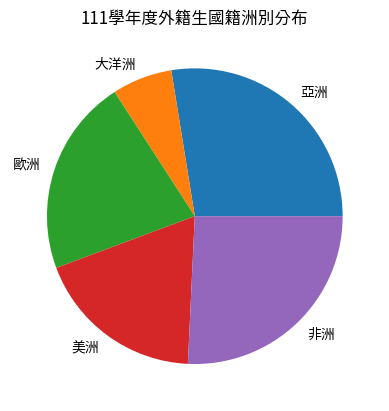

In [20]:
#用len算出筆數並印出
print("111學年度共有來自",len(df),"國的外籍生")

#印出各洲計數
count = df['洲別'].value_counts()
print(f"亞洲有 {count['亞洲']} 國\n大洋洲有 {count['大洋洲']} 國")
print(f"非洲有 {count['非洲']} 國\n歐洲有 {count['歐洲']} 國\n美洲有 {count['美洲']} 國。")

#使用groupby函數按照洲別（"洲別"）對數據進行分組
df_grouped = df.groupby("洲別")
CN=df_grouped['洲別'].count()

#將分組匯入list並設立索引
continents = list(CN.index)

#建立圓餅圖
plt.pie(CN, labels=continents)
plt.title("111學年度外籍生國籍洲別分布")#圖表名稱

3.**歐洲外籍生人數最多的國家**

     洲別   國別  學位生_正式修讀學位外國生  學位生_僑生(含港澳)  學位生_正式修讀學位陸生  非學位生_外國交換生  \
101  歐洲   德國            160            1             0         571   
100  歐洲   法國            131            2             0         703   
102  歐洲   英國             82            6             0         116   
108  歐洲  烏克蘭             67            0             0           6   
106  歐洲   波蘭             47            0             0          53   

     非學位生_外國短期研習及個人選讀  非學位生_大專附設華語文中心學生  非學位生_大陸研修生  非學位生_海青班  境外專班  
101                61               473           0         0     0  
100                60               487           0         0     0  
102                78               564           0         0     0  
108                26                87           0         0     0  
106                 7               141           0         0     0   

111學年度歐洲外籍生人數最多國家為 ['德國']


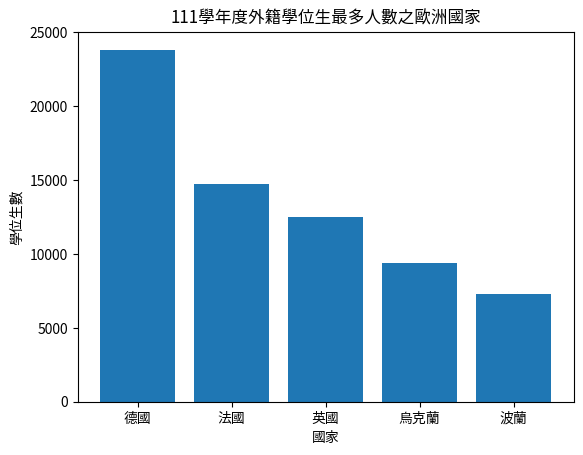

In [24]:
#取出需要的dataframe
df3=df[['洲別','國別','學位生_正式修讀學位外國生','學位生_僑生(含港澳)','學位生_正式修讀學位陸生'
    ,'非學位生_外國交換生','非學位生_外國短期研習及個人選讀','非學位生_大專附設華語文中心學生'
    ,'非學位生_大陸研修生','非學位生_海青班','境外專班']]
#篩選出dataframe"歐洲"
df3_1 = df3[df3['洲別'] == '歐洲']
#計算筆數後排序
df3_1_sorted = df3_1.sort_values(by=['學位生_正式修讀學位外國生','學位生_僑生(含港澳)','學位生_正式修讀學位陸生','非學位生_外國交換生',
    '非學位生_外國短期研習及個人選讀','非學位生_大專附設華語文中心學生','非學位生_大陸研修生','非學位生_海青班','境外專班']
                                 , ascending=False)
print(df3_1_sorted.head(), '\n')
print("111學年度歐洲外籍生人數最多國家為", df3_1_sorted.head(1)["國別"].values)

#建立新的dataframe，內容為學生數加總
df['總數']=df[['學位生_正式修讀學位外國生','學位生_僑生(含港澳)','學位生_正式修讀學位陸生'
    ,'非學位生_外國交換生','非學位生_外國短期研習及個人選讀','非學位生_大專附設華語文中心學生'
    ,'非學位生_大陸研修生','非學位生_海青班','境外專班']].sum(axis=1)#sum(axis=1)是為了跨欄做加總

#建立名為EU的list,導入學位生總和計數
EU = df3_1_sorted.head(5)['國別'].tolist()

#建立長條圖
plt.bar(EU, df['總數'].head(5))
plt.ylabel("學位生數")#y軸名稱
plt.xlabel("國家")#x軸名稱
plt.title("111學年度外籍學位生最多人數之歐洲國家")#圖表標題
plt.show()

4.**各洲外籍生人數比較**

Text(0.5, 1.0, '111學年度各洲外籍生人數比較')

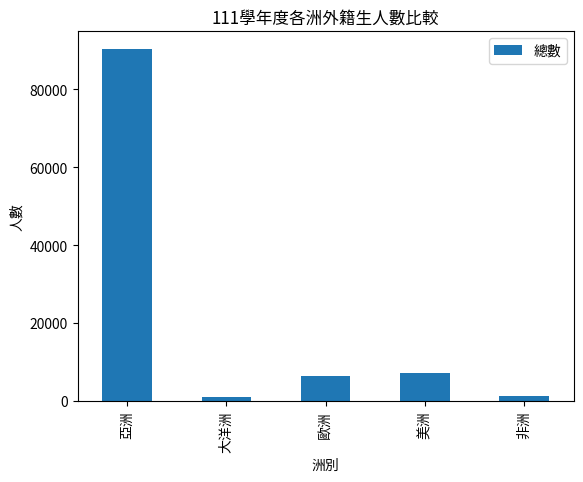

In [19]:
#建立新的dataframe，內容為學生數加總
df['總數']=df[['學位生_正式修讀學位外國生','學位生_僑生(含港澳)','學位生_正式修讀學位陸生'
    ,'非學位生_外國交換生','非學位生_外國短期研習及個人選讀','非學位生_大專附設華語文中心學生'
    ,'非學位生_大陸研修生','非學位生_海青班','境外專班']].sum(axis=1)#sum(axis=1)是為了跨欄做加總
#取出需要的dataframe
df4= df[['總數','洲別']]

#使用groupby函數將數據按照洲別分組
df4_grouped = df4.groupby("洲別")

#利用sum函數計算各洲總人數的加總,因為df['總數']往橫向加總所以只算到單國總數,將結果儲存在變數con中
con=df4_grouped.sum()

#建立一個空的DataFrame data儲存計算結果
data = pd.DataFrame()

#在DataFrame data中添加一列"總數"，其值為學生總數的數據
data["總數"] = con

#建立長條圖
con.plot(kind="bar")

plt.ylabel("人數")#y軸名稱
plt.xlabel("洲別")#x軸名稱
plt.title("111學年度各洲外籍生人數比較")#圖表標題

5.**交換生人數最多的國家**

     非學位生_外國交換生  國別
4           888  日本
1           765  印尼
100         703  法國
101         571  德國
136         399  美國 

111學年度外籍交換生最多人數之國家為 ['日本']


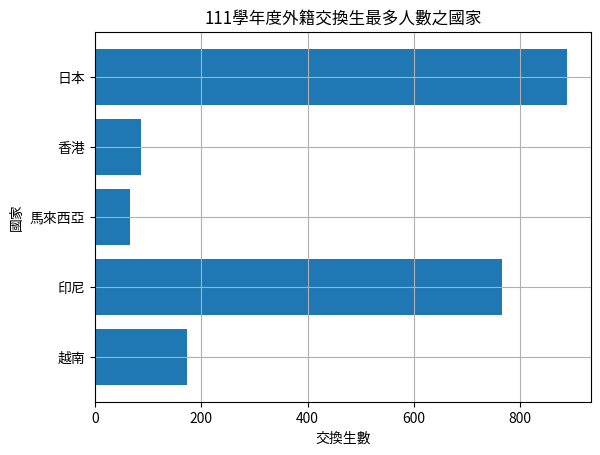

In [ ]:
#取出需要的資料欄位
df5 = df[['非學位生_外國交換生','國別']]

#計算筆數後排序
count = df5['國別'].value_counts()
df5_sorted = df5.sort_values(by=['非學位生_外國交換生'], ascending=False)

#印出排序後的結果
print(df5_sorted.head(), '\n')
print("111學年度外籍交換生最多人數之國家為", df5_sorted.head(1)["國別"].values)

#建立名為exc的list
exc = df["國別"].head(5).tolist()

#建立長條圖
plt.barh(exc, df5["非學位生_外國交換生"].head(5))
plt.ylabel("國家")#y軸名稱
plt.xlabel("交換生數")#x軸名稱
plt.title("111學年度外籍交換生最多人數之國家")#圖表標題
plt.grid(True) # 顯示圖表的格線

6.**各洲正式修讀學位生與交換生人數比較**

       學位生   交換生
洲別              
亞洲   31558  3155
大洋洲    209    65
歐洲     811  2295
美洲    1984   570
非洲     950    15


Text(0.5, 1.0, '111學年度各洲外籍生人數比較')

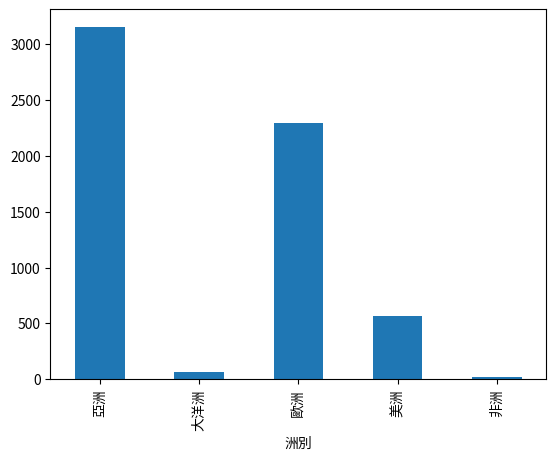

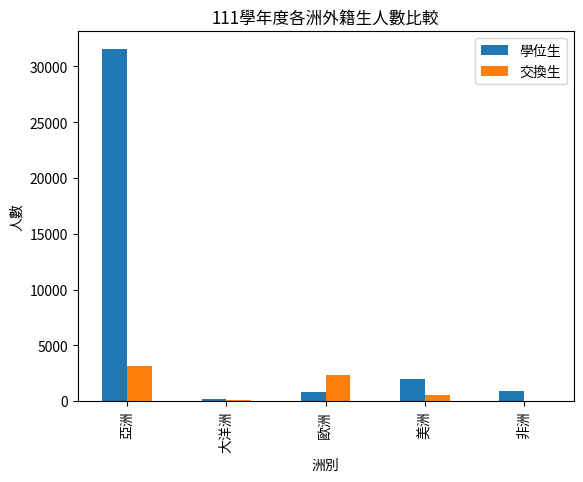

In [10]:
#取出需要的dataframe
df6=df[['洲別','國別','學位生_正式修讀學位外國生','非學位生_外國交換生']]

#使用groupby函數將數據按照洲別分組
df6_grouped = df6.groupby("洲別")

#利用sum函數計算各洲正式修讀學位生的加總,並以變數bc代稱
bc=df6_grouped['學位生_正式修讀學位外國生'].sum()

#利用sum函數計算各洲交換生的加總
ec=df6_grouped['非學位生_外國交換生'].sum()

#建立一個空的DataFrame data儲存計算結果,並以變數bc代稱
data = pd.DataFrame()

#在DataFrame data中添加一列"學位生"，其值為正式修讀學位學生總數的數據
data["學位生"] = bc

#在DataFrame data中添加一列"交換生"，其值為交換學生總數的數據
data["交換生"] = ec

#建立交換生人數長條圖
ec.plot(kind="bar")

#印出dataframe data中的數據,包含ec和bc
print(data)

#將dataframe data的數據繪製成長條圖,包含ec和bc
data.plot(kind="bar")

plt.ylabel("人數")#y軸名稱
plt.xlabel("洲別")#x軸名稱
plt.title("111學年度各洲正式修讀學位生與交換生人數比較")#圖表標題